## Santiago Valencia García - A00395902

In [24]:
# Librerías necesarias
!pip install tensorflow
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.callbacks import EarlyStopping

import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [8]:
# Importar el dataset
df = pd.read_csv('amazon.csv')
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [9]:
# Cree una función para preprocesar el texto
def preprocess_text(text):
    # Inicializar el lematizador
    lemmatizer = WordNetLemmatizer()

    # Tokenice el texto utilizando la función word_tokenize()
    tokens = word_tokenize(text)

    # Pase el texto a minúscula
    tokens = [word.lower() for word in tokens]

    # Elimine las stopwords utilizando stopwords.words('english')
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Además, eliminamos tokens no alfanuméricos

    # Lematice los tokens utilizando WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Una los tokens de los procesos previos en una sola cadena
    processed_text = ' '.join(tokens)

    # Retorne el texto procesado
    return processed_text

# Aplique su función a la columna reviewText del dataframe
df['processed_text'] = df['reviewText'].apply(preprocess_text)

# Muestra las primeras filas para verificar
df[['reviewText', 'processed_text']].head()

,reviewText,processed_text
0,This is a one of the best apps acording to a b...,one best apps acording bunch people agree bomb...
1,This is a pretty good version of the game for ...,pretty good version game free lot different le...
2,this is a really cool game. there are a bunch ...,really cool game bunch level find golden egg s...
3,"This is a silly game and can be frustrating, b...",silly game frustrating lot fun definitely reco...
4,This is a terrific game on any pad. Hrs of fun...,terrific game pad hr fun grandkids love great ...


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Obtenga su X y su y
X = df['processed_text']  # Usamos la columna con el texto preprocesado
y = df['Positive']        # La columna que indica si es positivo o negativo

# Codifique su y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Particione el conjunto en entrenamiento, validación y prueba con train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% entrenamiento, 30% temporal
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Divide el 30% restante en dos partes de 15% cada una

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (14000,)
Tamaño del conjunto de validación: (3000,)
Tamaño del conjunto de prueba: (3000,)


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Hágale padding a sus secuencias y obtenga aquellas para entrenamiento y aquellas para prueba

max_words = 10000  # Tamaño del vocabulario
max_len = 150

# Se crea el tokenizador con el número máximo de palabras
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

# Se transforma los textos en secuencias de enteros
sequences_train = tok.texts_to_sequences(X_train)
sequences_val = tok.texts_to_sequences(X_val)
sequences_test = tok.texts_to_sequences(X_test)

# Se aplica padding a las secuencias para que tengan la misma longitud
sequences_matrix_train = pad_sequences(sequences_train, maxlen=max_len)
sequences_matrix_val = pad_sequences(sequences_val, maxlen=max_len)
sequences_matrix_test = pad_sequences(sequences_test, maxlen=max_len)

print("Forma de sequences_matrix_train:", sequences_matrix_train.shape)
print("Forma de sequences_matrix_val:", sequences_matrix_val.shape)
print("Forma de sequences_matrix_test:", sequences_matrix_test.shape)

Forma de sequences_matrix_train: (14000, 150)
Forma de sequences_matrix_val: (3000, 150)
Forma de sequences_matrix_test: (3000, 150)


In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN

# Defina su modelo
# Incluya sus capas SimpleRNN s o LSTM, Dropout, etc

def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)

    # Añade una capa LSTM con dropout para evitar el sobreajuste
    layer = LSTM(64, return_sequences=True)(layer)
    layer = Dropout(0.4)(layer)

    # Agregar una segunda capa LSTM o una capa Dense intermedia para mejorar la capacidad de aprendizaje
    layer = LSTM(32)(layer)
    layer = Dropout(0.4)(layer)

    # Capa de salida densa para la clasificación
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)  # Sigmoid para clasificar entre 0 y 1

    model = Model(inputs=inputs, outputs=layer)
    return model

In [48]:
# Instancie su modelo

model = RNN()
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 150, 50)             │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 150, 64)             │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 150, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out_layer (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,889 (2.07 MB)

 Trainable params: 541,889 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Entrene su modelo

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    sequences_matrix_train, y_train,                    # Datos de entrenamiento
    validation_data=(sequences_matrix_val, y_val),      # Datos de validación
    epochs=5,                                          # Número de épocas
    batch_size=512,                                      # Tamaño de batch
    callbacks=[early_stopping],
    verbose=1                                           # Mostrar progreso
)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7301 - loss: 0.6163 - val_accuracy: 0.7633 - val_loss: 0.5224
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7868 - loss: 0.4642 - val_accuracy: 0.7053 - val_loss: 0.5122
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8207 - loss: 0.3655 - val_accuracy: 0.8463 - val_loss: 0.3454
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8905 - loss: 0.2887 - val_accuracy: 0.8640 - val_loss: 0.3282
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9122 - loss: 0.2319 - val_accuracy: 0.8760 - val_loss: 0.3007


In [50]:
# Evalúe su modelo

accr = model.evaluate(sequences_matrix_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8942 - loss: 0.2646


In [51]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.277
  Accuracy: 0.886


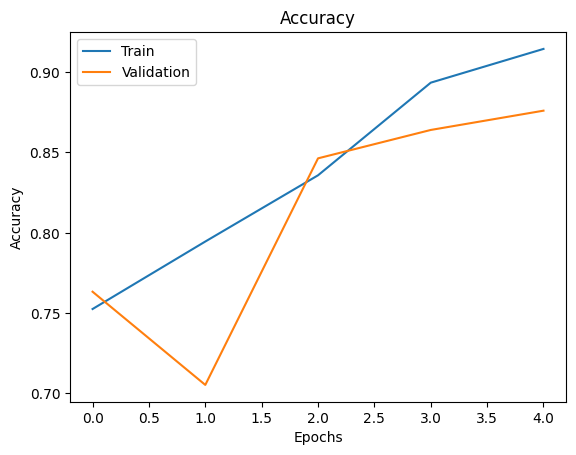

In [52]:
# Grafique sus resultados

import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label="Train")  # Precisión de entrenamiento
plt.plot(history.history['val_accuracy'], label="Validation")  # Precisión de validación
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()